In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip

# show plot intermediately under the calling cell
%matplotlib inline

# disable some warning
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
def parse(path):
    # read gz file and yield a list of lines in gz file
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    # for each d (line in list from parse function), assign
    # that line to each df[i] (for i is index)
    # return a df from dict
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Digital_Music_5.json.gz')

In [3]:
df.count()

reviewerID        64706
asin              64706
reviewerName      64529
helpful           64706
reviewText        64706
overall           64706
summary           64706
unixReviewTime    64706
reviewTime        64706
dtype: int64

Only reviewName has Null value, which is not important.

In [4]:
df.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"


In [5]:
# rls = review length series
rls = df.reviewText.apply(lambda x: len(str(x)))
rls.head(2)

0    950
1    574
Name: reviewText, dtype: int64

In [6]:
# create another df with fewer neccessary columns
ddf = df[['reviewText','summary','overall']]
ddf['reviewLength'] = rls
ddf.head(2)

,reviewText,summary,overall,reviewLength
0,"It's hard to believe ""Memory of Trees"" came ou...",Enya's last great album,5.0,950
1,"A clasically-styled and introverted album, Mem...",Enya at her most elegant,5.0,574


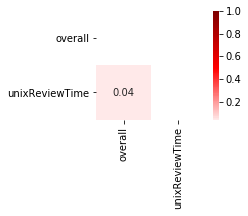

In [7]:
plt.figure(figsize=(3,2))
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap="seismic", square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0, mask=mask, annot= True)
plt.show()

#sum / desc / 

As can be seen from the chart, there is no relationship between overall score and the reviewLenghth, so we delete the review length feature and replace scores with words.

In [8]:
del ddf['reviewLength']

In [9]:
ddf.loc[ddf.overall==1, 'overall']='bad'
ddf.loc[ddf.overall==2, 'overall']='bad'
ddf.loc[ddf.overall==3, 'overall']='neutral'
ddf.loc[ddf.overall==4, 'overall']='good'
ddf.loc[ddf.overall==5, 'overall']='good'
ddf.head(2)

,reviewText,summary,overall
0,"It's hard to believe ""Memory of Trees"" came ou...",Enya's last great album,good
1,"A clasically-styled and introverted album, Mem...",Enya at her most elegant,good


In [13]:
ddf[ddf.reviewText=='']

,reviewText,summary,overall
4519,,Too Many Changes Too Quickly,neutral


In [10]:
# write to csv file
ddf.to_csv('reviews_Digital_Music_5-cleaned.csv', index=False)